In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)
pd.options.display.max_columns = 39

## Data  개요
**적포도주 및 백포도주 샘플의 물리화학적 특성 및 품질 등급**
- UCI 머신러닝 저장소에 공개 : [dataset](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)
- 포르투갈 "Vinho Verde" 와인의 레드 및 화이트 변종 샘플에 대한 정보를 제공
- 각 와인 샘플은 와인 전문가에 의해 품질 평가를 받았고 화학적 테스트를 거쳤음
- 개인 정보 보호 및 물류 문제로 인해 포도 유형, 와인 브랜드, 와인 판매 가격 등에 대한 데이터가 없음

```
   Input variables (based on physicochemical tests):
   1 - fixed acidity (고정된 산도)
   2 - volatile acidity (휘발성 산도)
   3 - citric acid (구연산)
   4 - residual sugar (잔여 설탕)
   5 - chlorides (염화물)
   6 - free sulfur dioxide (유리 이산화황)
   7 - total sulfur dioxide (총 이산화황)
   8 - density (밀도)
   9 - pH (산도)
   10 - sulphates (황산염)
   11 - alcohol (알코올)
   
   Output variable (based on sensory data): 
   12 - quality (품질) (score between 0 and 10) 
```


## Step 1: 질문하기 (Ask questions)
데이터가 주어진 상태에서 질문을 할 수도 있고, 질문에 답할 수 있는 데이터를 수집할 수도 있다.

**질문 예시**
- 와인의 품질을 예측하는 데 가장 중요한 화학적 특성은 무엇일까?
- 어떤 유형(white, red)의 와인이 더 좋은 평가를 받을까?
- 알코올 도수가 높은 와인이 더 좋은 평가를 받을까?
- 더 달콤한 와인이 더 나은 평가를 받을까?
- 어느 정도의 산도가 와인 품질에 영향을 미칠까?

## Step 2: 데이터 랭글링 (Wrangle data)
- 데이터 랭글링 : 원자료(raw data)를 보다 쉽게 접근하고 분석할 수 있도록 데이터를 정리하고 통합하는 과정
(참고. 위키피디아)
- 세부적으로는 데이터의 수집(gather), 평가(assess), 정제(clean) 작업으로 나눌 수 있다.

### 2.1 수집(gather)

In [6]:
df_white = pd.read_csv('./dataset/winequality-white.csv', sep=';')
df_red = pd.read_csv('./dataset/winequality-red.csv', sep=';')

In [9]:
df_white.count()

fixed acidity           4898
volatile acidity        4898
citric acid             4898
residual sugar          4898
chlorides               4898
free sulfur dioxide     4898
total sulfur dioxide    4898
density                 4898
pH                      4898
sulphates               4898
alcohol                 4898
quality                 4898
dtype: int64

In [10]:
df_red.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

### 2.2 평가(assess)

**샘플의 개수**, **컬럼의 개수**

In [11]:
df_red.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

**누락 데이터 확인**

In [12]:
df_red.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


**중복 데이터 확인**

In [17]:
#df_red.duplicated()
df_red.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


**quality 컬럼(특성)의 고유값과 개수**

In [15]:
df_red['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [16]:
df_red['quality'].nunique()

6

**통계 정보 확인**

### 2.3 정제(clean)

**중복데이터 삭제**

In [18]:
df_red.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

In [19]:
df_white.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

**두 데이터 프레임 합치기**

In [23]:
df_red['color'] = 1.
df_white['color'] = 0.

df_wine = pd.concat([df_red, df_white])
df_wine.reset_index(drop=True, inplace=True)
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   int64  
 12  color                 5320 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 540.4 KB


## Step 3: 데이터 탐색 (Exploratory Data Analysis)
데이터의 패턴을 찾고, 관계를 시각화 하는 작업 등으로 통해 데이터에 대한 직관을 극대화 한다.

### 3.1 새로 결합된 데이터 프레임으로 histogram 그리기
- fixed acidity, total sulfur dioxide, pH, alcohol 

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'total sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'alcohol'}>]], dtype=object)

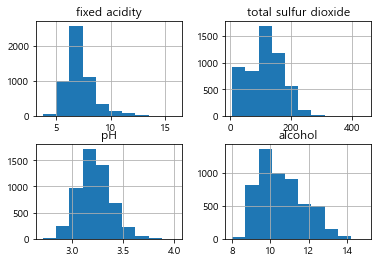

In [27]:
df_wine.hist(['fixed acidity', 'total sulfur dioxide', 'pH', 'alcohol'])

- Question) 특성 중 오른쪽으로 꼬리가 긴 분포(right skewed distribution)는 어떤것인가?
- Answer) 

### 3.2 새로 결합된 데이터 프레임으로 산점도 그리기
- quality와 아래의 특성들간의 상관관계 파악하기
- volatile acidity, residual sugar, pH, alcohol

In [35]:
df_wine[['volatile acidity', 'residual sugar', 'pH', 'alcohol']].corr()

,volatile acidity,residual sugar,pH,alcohol
volatile acidity,1.000000,-0.163696,0.246687,-0.065411
residual sugar,-0.163696,1.000000,-0.234522,-0.305242
pH,0.246687,-0.234522,1.000000,0.097314
alcohol,-0.065411,-0.305242,0.097314,1.000000


- Question) 품질에 긍정적인 영향을 미칠 가능성이 높은 특성은 어떤 것인가?
- Answer) 

## Step 4: 결론 도출 또는 예측 (Draw conclusions or make predictions)

###  4.1 어떤 유형(white, red)의 와인이 더 좋은 평가를 받을까?

- **분석결과** :

###  4.2 어느 정도의 산도가 와인 품질에 영향을 미칠까?
- 산도를 4등분하여 (low, medium, medium_high, high ) 어느 단계의 quality의 평균값이 높은지 확인하기

- **분석결과** :

###  4.3 더 달콤한 와인이 더 나은 평가를 받을까?


**분석 결과** :

###  4.4  알코올 도수가 높은 와인이 더 좋은 평가를 받을까?

**분석 결과** :

## Step 5: 결과 공유 (Communicate the results)
보고서, 이메일, 블로그 등 다양한 방법을 통해 발견한 통찰들을 공유할 수 있다.